<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

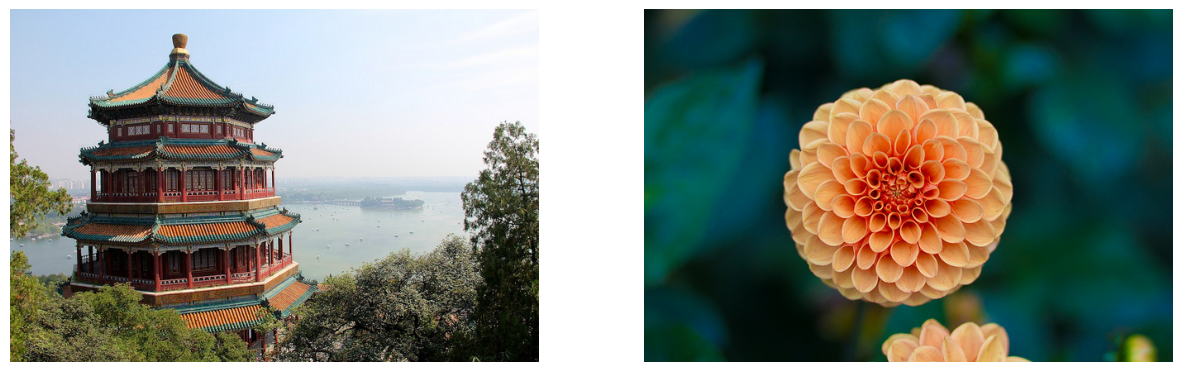

In [2]:
images= load_sample_images()["images"]
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

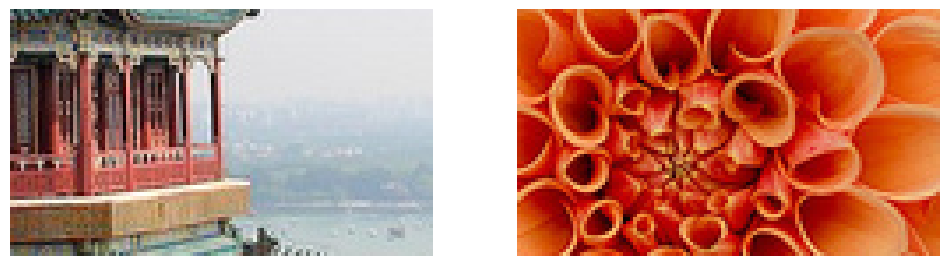

In [3]:
images=tf.keras.layers.CenterCrop(height=70, width=120)(images)
images=tf.keras.layers.Rescaling(scale=1 / 255.)(images)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

In [4]:
images.shape

TensorShape([2, 70, 120, 3])

In [5]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps=conv_layer(images)

In [6]:
fmaps.shape

TensorShape([2, 64, 114, 32])

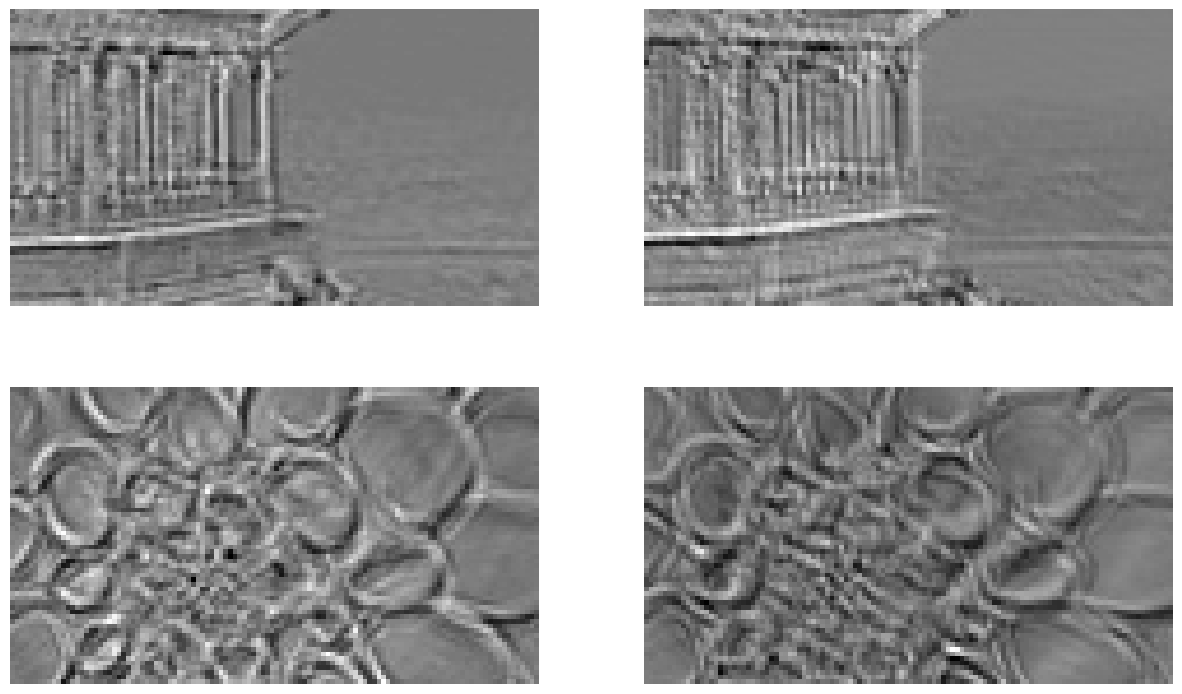

In [7]:
#extra code - displays two output feature maps for each image

plt.figure(figsize=(15, 9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2, image_idx*2+fmap_idx+1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
    plt.axis("off")

plt.show()

In [8]:
conv_layer=tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                  padding="same")
fmaps=conv_layer(images)

In [9]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [10]:
conv_layer=tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same",
                                  strides=2)
fmaps=conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [11]:
tf.random.set_seed(42)
filters=tf.random.normal([7,7,3,2])
biases=tf.zeros([2])
fmaps=tf.nn.conv2d(images, filters, strides=1, padding="SAME")+biases

#Pooling layers

#Implementing Pooling Layers With Keras

#Max Pooling

In [12]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [13]:
output=max_pool(images)

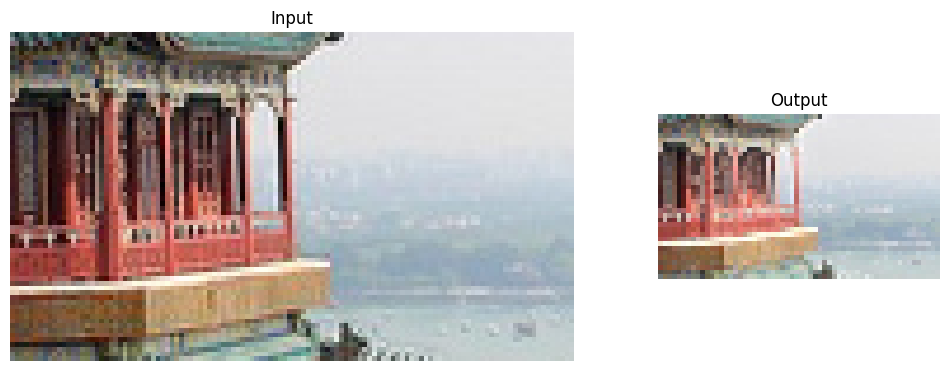

In [14]:
import matplotlib as mpl

fig=plt.figure(figsize=(12,8))
gs=mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1])

ax1=fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(images[0]) # plot the 1st image
ax1.axis("off")
ax2=fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output[0]) # plot the output for the 1st image
ax2.axis("off")
plt.show()

# Global average pooling

In [15]:
class DepthPool(tf.keras.layers.Layer):
    def __init__(self, pool_size=2, **kwargs):
        super().__init__(**kwargs)
        self.pool_size = pool_size

    def call(self, inputs):
        shape = tf.shape(inputs)  # shape[-1] is the number of channels
        groups = shape[-1] // self.pool_size  # number of channel groups
        new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
        return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

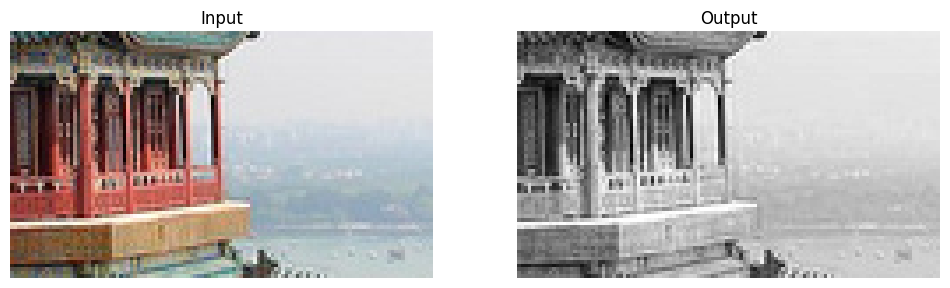

In [16]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(images[0])  # plot the 1st image
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output")
plt.imshow(depth_output[0, ..., 0], cmap="gray")  # plot 1st image's output
plt.axis("off")
plt.show()

In [17]:
global_avg_pool=tf.keras.layers.GlobalAvgPool2D()

In [18]:
images.shape

TensorShape([2, 70, 120, 3])

In [19]:
global_avg_pool=tf.keras.layers.Lambda(
      lambda X: tf.reduce_mean(X, axis=[1,2]))

In [20]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.643388  , 0.59718215, 0.5825038 ],
       [0.7630747 , 0.26010972, 0.10848834]], dtype=float32)>

In [21]:
images[0].shape, global_avg_pool(images)[0].shape

(TensorShape([70, 120, 3]), TensorShape([3]))

# CNN Architectures

# Tackling Fashion MNIST With a CNN

In [22]:
import numpy as np

mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
X_train.shape

(55000, 28, 28, 1)

In [24]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28, 1]),
    tf.keras.layers.Conv2D(filters=64, padding="same", kernel_size=7,
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, padding="same", kernel_size=3,
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128, padding="same", kernel_size=3,
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, padding="same", kernel_size=3,
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256, padding="same", kernel_size=3,
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [25]:
# from functools import partial

# tf.random.set_seed(42)  # extra code – ensures reproducibility
# DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
#                         activation="relu", kernel_initializer="he_normal")
# model = tf.keras.Sequential([
#     DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
#     tf.keras.layers.MaxPool2D(),
#     DefaultConv2D(filters=128),
#     DefaultConv2D(filters=128),
#     tf.keras.layers.MaxPool2D(),
#     DefaultConv2D(filters=256),
#     DefaultConv2D(filters=256),
#     tf.keras.layers.MaxPool2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128, activation="relu",
#                           kernel_initializer="he_normal"),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=64, activation="relu",
#                           kernel_initializer="he_normal"),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=10, activation="softmax")
# ])

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid))
score=model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred=model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.6128 - loss: 1.1070 - val_accuracy: 0.8738 - val_loss: 0.3534
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8459 - loss: 0.4583 - val_accuracy: 0.8862 - val_loss: 0.3164
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8771 - loss: 0.3691 - val_accuracy: 0.9038 - val_loss: 0.2781
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8902 - loss: 0.3270 - val_accuracy: 0.9070 - val_loss: 0.2770
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9025 - loss: 0.2859 - val_accuracy: 0.9022 - val_loss: 0.2769
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9077 - loss: 0.2723 - val_accuracy: 0.9062 - val_loss: 0.2736
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9143 - loss: 0.2488 - val_accuracy: 0.9078 - val_loss: 0.2743
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9169 - loss: 

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,241,505 (16.18 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,827,671 (10.79 MB)

# Implementing a ResNet-34 CNN Using Keras

In [28]:
from functools import partial


DefaultConv2D=partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                      padding="same", kernel_initializer="he_normal")



class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation=tf.keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides>1:
      self.skip_layers= [
          DefaultConv2D(filters, kernel_size=1, strides=strides),
          tf.keras.layers.BatchNormalization()
      ]

  def call(self, inputs):
    Z=inputs
    for layer in self.main_layers:
      Z=layer(Z)
    skip_Z=inputs
    for layer in self.skip_layers:
        skip_Z=layer(skip_Z)
    return self.activation(Z+skip_Z)


In [29]:
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[28,28,1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"),
])
prev_filters=64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
  strides=1 if filters==prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters=filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Using Pretrained Models from Keras

In [30]:
model= tf.keras.applications.ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [31]:
import tensorflow as tf

images=load_sample_images()["images"]

images_stacked= tf.stack(images, axis=0)

images_resized= tf.keras.layers.Resizing(height=224, width=224,
                                          crop_to_aspect_ratio=True)(images_stacked)

In [32]:
inputs= tf.keras.applications.resnet50.preprocess_input(images_resized)

In [33]:
inputs=tf.cast(inputs, tf.float32)

In [34]:
Y_proba=model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(2, 1000)

In [35]:
top_K=tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id, name, y_proba, in top_K[image_index]:
    print(f" {class_id}-{name:12s} {y_proba:.2%}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image #0
 n03877845-palace       54.83%
 n03781244-monastery    24.40%
 n02825657-bell_cote    18.74%
Image #1
 n04522168-vase         32.17%
 n11939491-daisy        17.87%
 n03530642-honeycomb    12.03%


# Pretrained Models for Transfer Learning

In [36]:
import tensorflow_datasets as tfds

dataset, info= tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size=info.splits["train"].num_examples
class_names= info.features["label"].names
n_classes=info.features["label"].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.OSLQTQ_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [37]:
dataset_size

3670

In [38]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [39]:
n_classes

5

In [40]:
test_set_raw, valid_set_raw, train_set_raw=tfds.load(
    "tf_flowers",
    split=["train[:10]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True
)

In [41]:
train_set_raw

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

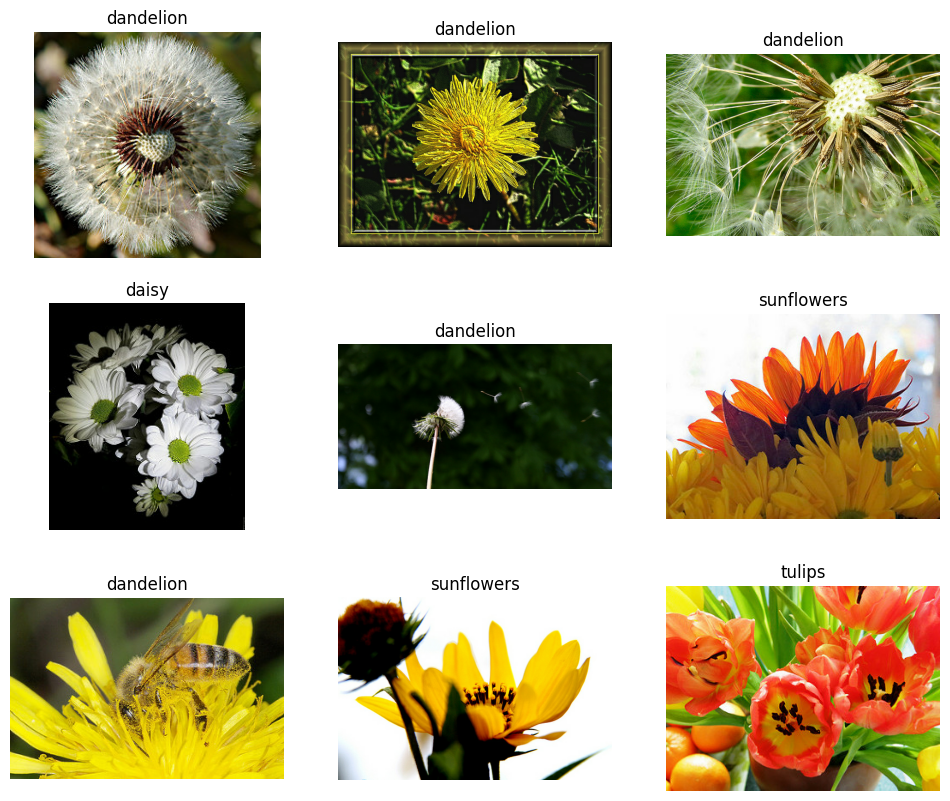

In [47]:
import matplotlib.pyplot as plt

index=0
plt.figure(figsize=(12,10))
for image, label in train_set_raw.take(9):
  index+=1
  plt.subplot(3,3, index)
  plt.imshow(image)
  plt.title(class_names[label])
  plt.axis('off')

In [58]:
tf.keras.backend.clear_session()


batch_size=32

preprocess=tf.keras.Sequential([
    tf.keras.layers.Resizing(height = 224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])


train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

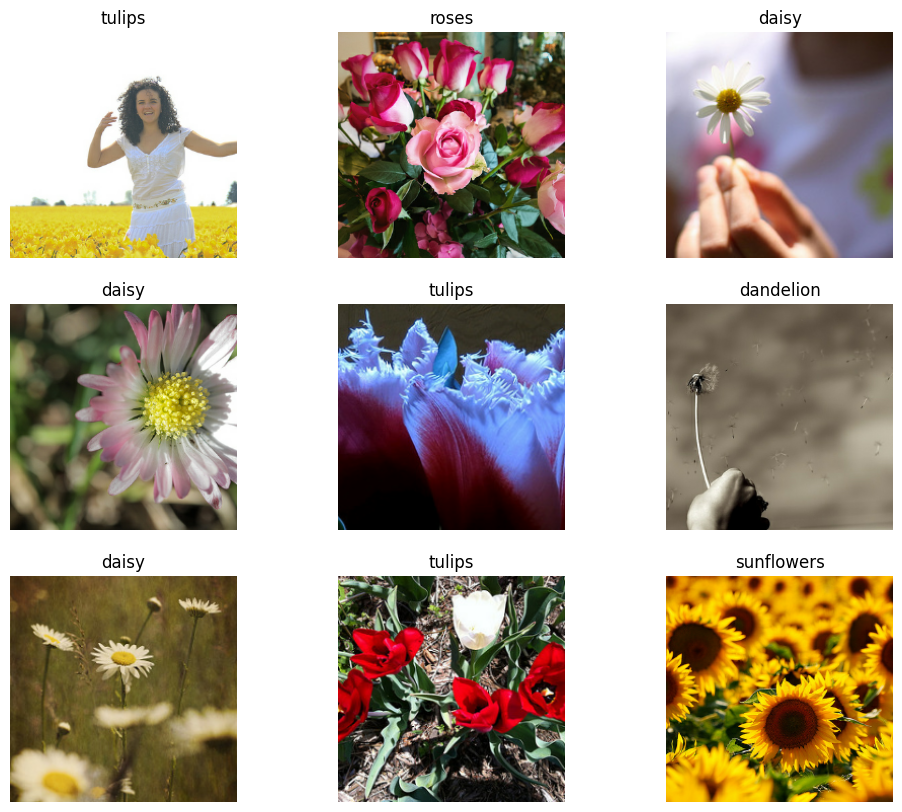

In [59]:
plt.figure(figsize=(12,10))
for image_batch, label_batch in train_set.take(1):
  for index in range(9):
    plt.subplot(3, 3, index+1)
    plt.imshow((image_batch[index]+1) / 2)
    plt.title(class_names[label_batch[index]])
    plt.axis('off')

In [60]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.4, seed=42),
])

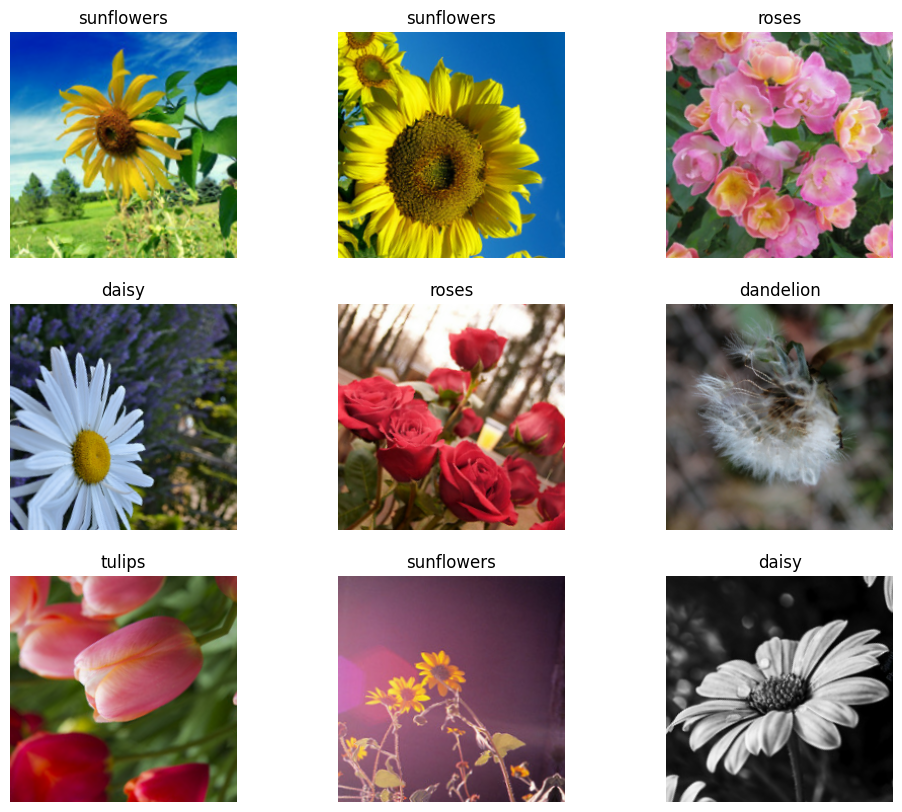

In [62]:
import numpy as np

plt.figure(figsize=(12,10))
for X_batch, y_batch in train_set.take(1):
  X_batch_augmented = data_augmentation(X_batch)
  for index in range(9):
    plt.subplot(3,3, index+1)
    plt.imshow(X_batch_augmented[index] / 2 + 0.5)
    plt.axis("off")
    plt.title(class_names[y_batch[index]])

In [63]:
n_classes

5

In [64]:
tf.random.set_seed(42)
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [65]:
for layer in base_model.layers:
  layer.trainable = False

In [66]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history=model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 271ms/step - accuracy: 0.6786 - loss: 1.2272 - val_accuracy: 0.8548 - val_loss: 0.6099
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.9011 - loss: 0.3655 - val_accuracy: 0.8675 - val_loss: 0.5533
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9526 - loss: 0.1443 - val_accuracy: 0.8802 - val_loss: 0.5425


In [67]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history=model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.9645 - loss: 0.1022 - val_accuracy: 0.8639 - val_loss: 0.5763
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9771 - loss: 0.0652 - val_accuracy: 0.8621 - val_loss: 0.5459
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.9746 - loss: 0.0767 - val_accuracy: 0.8730 - val_loss: 0.5865
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9858 - loss: 0.0408 - val_accuracy: 0.8711 - val_loss: 0.6186
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9930 - loss: 0.0272 - val_accuracy: 0.8802 - val_loss: 0.5725
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - accuracy: 0.9974 - loss: 0.0141 - val_accuracy: 0.8693 - val_loss: 0.6242
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.9970 - loss: 0.0210 - val_accuracy: 0.8748 - val_loss: 0.6136
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.9971 - loss: 0.0171 - val_accu